In [7]:
# Use et2 for compatibility
from kuibit.simdir import SimDir
import kuibit.visualize_matplotlib as viz
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = SimDir("/home/jorge/Escritorio/Lic. Física/1Ramos/1Semestre X/Tesina/Toolkit/Simulations/testPert32_Minus3Amp/output-0000/")

In [3]:
print(sim)

Indexed 19 files and 2 subdirectories
Folder /home/jorge/Escritorio/Lic. Física/1Ramos/1Semestre X/Tesina/Toolkit/Simulations/testPert32_Minus3Amp/output-0000
/home/jorge/Escritorio/Lic. Física/1Ramos/1Semestre X/Tesina/Toolkit/Simulations/testPert32_Minus3Amp/output-0000
Available scalar timeseries:
[]

Available minimum timeseries:
[]

Available maximum timeseries:
[]

Available norm1 timeseries:
[]

Available norm2 timeseries:
[]

Available average timeseries:
['betax', 'betay', 'betaz', 'kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'H', 'rho', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3', 'alp']
Variables available: dict_keys([])

Available grid data of dimension 1D (x): 
[]


Available grid data of dimension 1D (y): 
[]


Available grid data of dimension 1D (z): 
[]


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
['gxx', 'gxy', 'gx

In [4]:
rho = sim.gf.xyz['rho']

In [6]:
#rho.available_times
rho.available_iterations

[0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500]

In [32]:
min([rho[i].min() for i in range(0, 2501, 100)])

4.4305564728406227e-05

In [64]:
# Compute global min and max across all iterations
#rho_max = max([rho[i].max() for i in range(0, 2501, 100)])
#rho_min = min([rho[i].min() for i in range(0, 2501, 100)])

# Try using just the 1st iterations so set these extremal values
#rho_max = rho[0][0][0].max()
#rho_min = rho[0][0][0].min()

# None of these normalization worked here

def plot_rho(i, z_index, norm=False):
    
    rho_max = rho[i].max()
    rho_min = rho[i].min()

    slice_xy = rho[i][0][0][:, :, z_index]
    plt.imshow(slice_xy, origin="lower", cmap="inferno", 
               vmin = rho_min, vmax = rho_max)
    plt.colorbar(label=r"$\rho$")
    #print(slice_xy[0][0])
    #plt.xlabel("x")
    #plt.ylabel("y")
    #plt.title(f"Slice at z={z_index} | iteration={i}")
    #plt.show()

0.053462529171423016
0.011106575972456718
0.0046711551379909
0.0025621570875783133
0.001617570628648905
0.001114342101129378
0.0008147104539181351
0.0006219108379794711
0.0004905375812826847


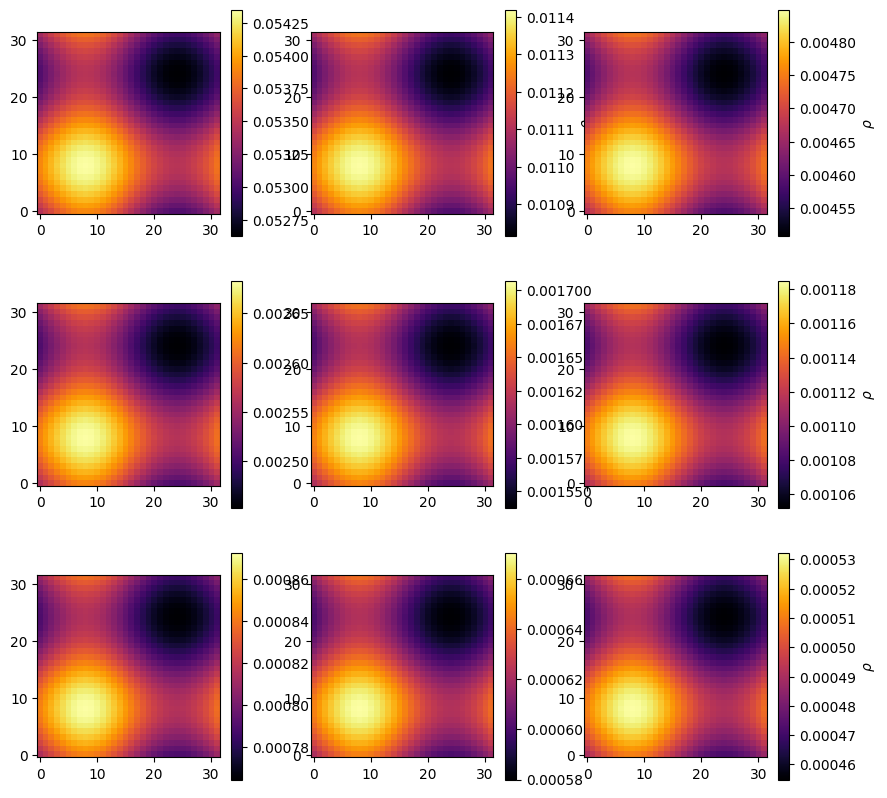

In [49]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plot_rho(i * 100, 7)
    plt.tight_layout

In [26]:
for i in range(0, 2500, 100):
    print(rho[i][0][0][:, :, 0][6][6])

0.053843815929518465
0.01124058826684119
0.004746846061070252
0.002613189450835714
0.00165534912306177
0.001143975848761602
0.0008388896176085366
0.0006422109367127836
0.0005079539002106414
0.0004121843177002583
0.00034144170348808685
0.00028768138441757197
0.00024585375570806365
0.00021265841131847137
0.00018586377399168368
0.000163916737692624
0.000145709142346807
0.00013043296938796938
0.00011748771233146372
0.00010641948419630149
9.688001107048303e-05
8.859841813445243e-05
8.136144021137767e-05
7.499929844378369e-05
6.937546106178105e-05


I think the values are changing but I'm not noticing it in the plots because of the colormap, everytime the plot is generated, the colormap sort of normalizes the values. Now If I try to manually set the min and max values, this thing looks like all zeros (i.e., all black) 

- Luego, si trato de normalizar respecto a la primera iteración, veo que en las demás iteraciones los valores son comparativamente mucho más bajos y por tanto todo se va al color negro, no puedo ver las perturbaciones

- Pasando de estas normalizaciones, si hacemos los gráficos por defecto, vemos que la forma de la perturbación (al menos en este corte de z=0) no varía, sino que solo cambia la magnitud de rho (i.e., se mantienen las proporciones, solo hay un escalamineto hacia abajo)

0
1
3
5
7
8
10
12
14
16
17
19
21
23
24


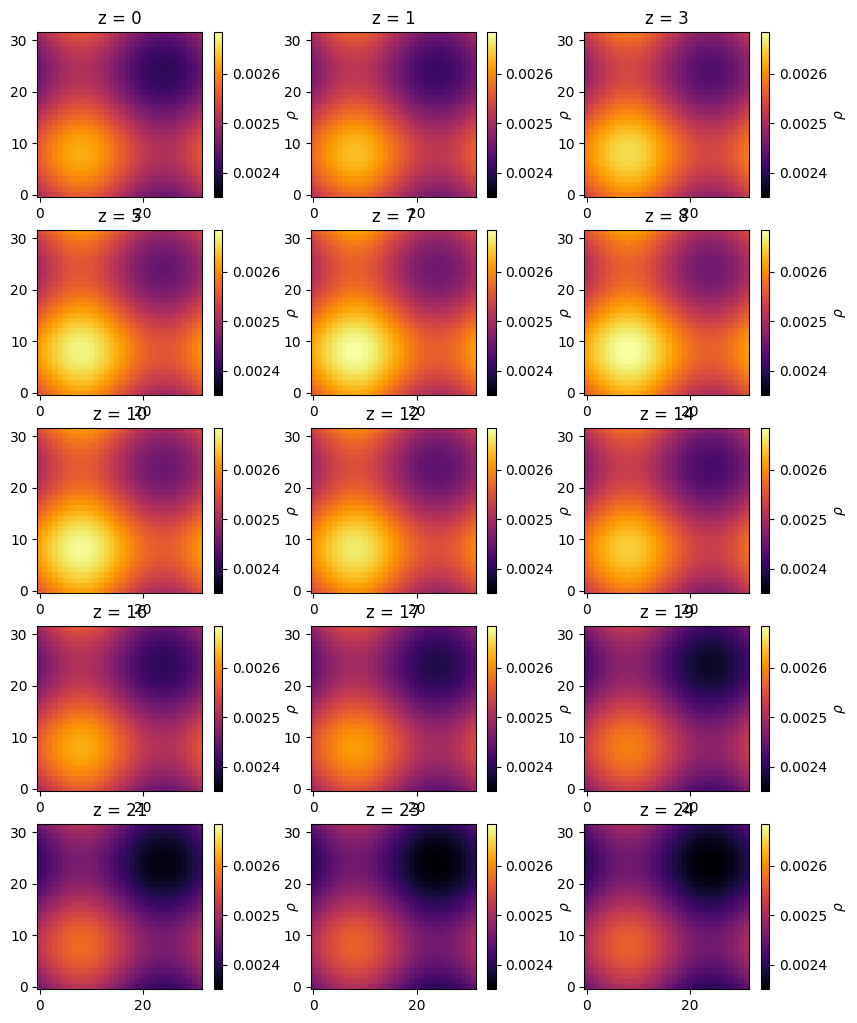

In [ ]:
# Explorar varios cortes en el eje z

plt.figure(figsize=(10, 15))
for i in range(15):
    plt.subplot(6,3,i+1)
    plt.title(f"z = {i*32//18}")
    plot_rho(300, i*32//18)
    #print(i*32//18)
    plt.tight_layout    

#plt.savefig("rho_multiple_z_levels", dpi=400)    

Damn imshow, estaba desplazando los valores sin mover el colormap, ahora creo que la normalización va a resultar útil, porque estamos en la misma iteración

In [83]:
plt.figure(figsize=(8, 8))
for i in range(1, 32, 2):
    plt.title(f"z = {i}")
    plot_rho(1200, i) 
    plt.savefig(f"iter1200_z={i}.png", dpi=400)
    plt.clf()

<Figure size 800x800 with 0 Axes>

In [ ]:
# Wait...

